# IRIS Dataset

The Iris dataset is a dataset made by biologist Ronald Fisher and contains 50 samples of 3 species of Iris, Iris Satosa, Iris Verginica and Iris Versicolor summing up to 150 data points.<br>
Four features were considered, the petal length, the sepal length, petal width and sepal width and using these four features, we will be differentiating the flowers. <br><br>
## Importing the required libraries

In [1]:
import numpy as np
import pandas as pd

#plotting the data
import matplotlib.pyplot as plt
import seaborn as sns
# from pandas.tools.plotting import scatter_matrix # we dont need this here

#preprocessing the dataset
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# #feature selection
from sklearn.decomposition import PCA

#sample selection/training and test set selection
from sklearn.model_selection import train_test_split

#classification algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#ensembled classificaiton algorithms
from sklearn.ensemble import RandomForestClassifier

#analysis of classificaiton algorithms
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

#remove warning to make the notebook prettier
import warnings
warnings.filterwarnings('ignore')

#plot graphs in the notebook
%matplotlib inline

## Reading the dataset

In [2]:
iris = pd.read_csv("../dataset/IRIS.csv")

In [3]:
iris.shape

(150, 5)

In [4]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [5]:
#view 5 random samples from the dataset
iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
86,6.7,3.1,4.7,1.5,Iris-versicolor
78,6.0,2.9,4.5,1.5,Iris-versicolor
144,6.7,3.3,5.7,2.5,Iris-virginica
99,5.7,2.8,4.1,1.3,Iris-versicolor
21,5.1,3.7,1.5,0.4,Iris-setosa


In [6]:
iris['species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: species, dtype: int64

## Data Exploration

In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.3+ KB


All the feature columns are numeric and our target column, the species of the flower are of categorical type.

In [8]:
iris.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


Descrive has given us the 5 number summary of the dataset<br>
1) we see that petal length has a range 1.0-6.9 and the highest standard daviation in all the 4 features. We can take it as an important feature as a higher standard deviation means a higher variance implying it provides more data than the other features.<br>
2) sepal width has the least standard daviation so we can consider it a lower valued feature (gives less information)

In [9]:
iris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

There are no null values in the dataset and there are no zeroes as well (we figured that out from the description of the dataset). So we do not need to impute anything in the data.

## Data Visualization
<br>
Since the number of features are low(4) we can plot a pairplot.

<Figure size 1008x1008 with 0 Axes>

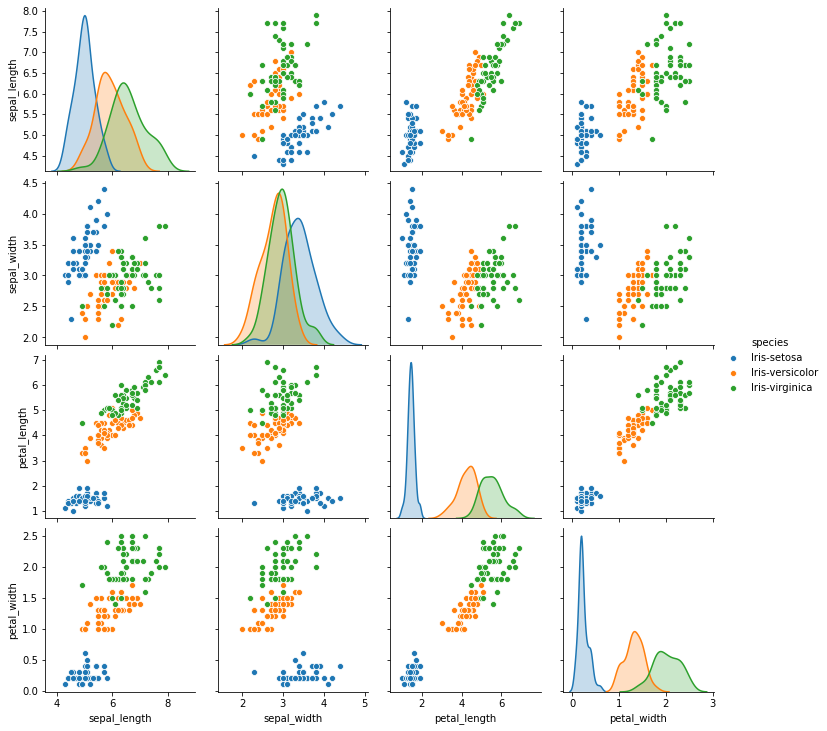

In [10]:
plt.figure(figsize=(14,14))
sns.pairplot(data=iris, hue='species')

To visualize the data, we can consider only the lower or upper part of the plot as they will be the same.<br>
<br>
###### Scatter Plot inference
1. Sepal Length<br>
    1) sepal-Length vs sepal-width
        * Iris satosa is almost distinctable while iris-versicolor and iris-verginica are highly colocated
    2) sepal-Length vs petal-length
        * Iris Satosa is complelely distinct and Iris versicolor and Iris verginica are almost linearly separable.
    3) sepal-Length vs petal-width
        * Iris Satosa again is completely separable while Iris versicolor and Iris verginica are colocated.
2. Sepal Width<br>
    1) Sepal Width vs petal-length
        * Iris Satosa is completely separable while Iris versicolor and Iris verginica are colocated.
    2) Sepal Width vs petal Width
        * Iris Satosa is completely separable while Iris versicolor and Iris verginica are colocated.
3. Petal Length<br>
    1) Petal Length vs Petal Width
        * Iris Satosa is completely separable while Iris versicolor and Iris verginica are colocated.

###### Distplot Inference

Looking at the frequency distribution we see that :-
1. Sepal Length
    * Since all the three species are moderately overlapping, we can not separate them with just Sepal Length
2. Sepal Width
    * All the three species have similar sepal width.
3. Petal Length
    * Iris Satosa has the lowest Petal length while Iris versicolor and Iris Verginica have almost similar petal lengths but Iris Versicolor has petal lengths less than their Verginica cousins.
4. Petal Width
    * Iris Satosa has the lowest petal width and its cousins, the Iris Verginica and Iris Versicolor have similar petal widths.
<br><br><br><br>

Let us group the data by the species of the flowers

In [11]:
iris_species = iris.groupby('species')
iris_species.describe().T

species             Iris-setosa  Iris-versicolor  Iris-virginica
sepal_length count    50.000000        50.000000       50.000000
             mean      5.006000         5.936000        6.588000
             std       0.352490         0.516171        0.635880
             min       4.300000         4.900000        4.900000
             25%       4.800000         5.600000        6.225000
             50%       5.000000         5.900000        6.500000
             75%       5.200000         6.300000        6.900000
             max       5.800000         7.000000        7.900000
sepal_width  count    50.000000        50.000000       50.000000
             mean      3.418000         2.770000        2.974000
             std       0.381024         0.313798        0.322497
             min       2.300000         2.000000        2.200000
             25%       3.125000         2.525000        2.800000
             50%       3.400000         2.800000        3.000000
             75%       3.675000         3.000000        3.175000
             max       4.400000         3.400000        3.800000
petal_length count    50.000000        50.000000       50.000000
             mean      1.464000         4.260000        5.552000
             std       0.173511         0.469911        0.551895
             min       1.000000         3.000000        4.500000
             25%       1.400000         4.000000        5.100000
             50%       1.500000         4.350000        5.550000
             75%       1.575000         4.600000        5.875000
             max       1.900000         5.100000        6.900000
petal_width  count    50.000000        50.000000       50.000000
             mean      0.244000         1.326000        2.026000
             std       0.107210         0.197753        0.274650
             min       0.100000         1.000000        1.400000
             25%       0.200000         1.200000        1.800000
             50%       0.200000         1.300000        2.000000
             75%       0.300000         1.500000        2.300000
             max       0.600000         1.800000        2.500000

We see that the description by species compliments the inferences we made from the pairplot.

Now that we have explored the data, we can now apply machine learning algorithms to differentiate between the three Iris species. But before we get into that, we need to make sure that all our data is numeric as all our algorithms only work with numeric data. So, we will be Label Encoding our target variable, 'Species'.<br>
And since this is a classification problem, we will be using classification algotithms like KNN, SVM and Decision Tree with ensembling algorithms like Random Forest Classifier and then use KFold cross validation on top of it all.<br>
We will not use Logistic Regression in this problem because it's better suited for bivariate targets and not multi-variate, 3 in our case.

### Data Preprocessing
<br>
If we had null or categorical values in the features columns we would have done the data preprocessing step before the visualization depending on the problem statement.

In [12]:
#Label encoding the target
label_encoder = LabelEncoder()
iris['species'] = label_encoder.fit_transform(iris['species'])
print(iris['species'].value_counts())
print('\n{}'.format(iris.info()))

2    50
1    50
0    50
Name: species, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.3 KB

None


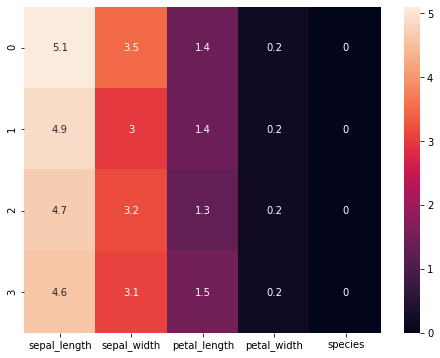

In [13]:
#we use heatmap after encoding as 'Species' was a categorical value and heatmap can only use numeric values
plt.figure(figsize=(8,6))
sns.heatmap(iris[0:4], annot=True)

Since none of the features are corelated, we can not make any conclusions on what features to choose and which ones not to. If there was a corelation, we would have chosen those features that were highly corelated(>0.7 or <-0.7) as our features as they will affect our target the most. Then we would have checked for feature to feature corelation to drop highly corelated features and pick the one with higher variance.

Now that all our feature and target columns are numeric, we can scale them and then apply machine learning algorithms to distinguish between the Iris species.<br>

### MinMax Scaling
We will minmax scale the data because it's generally better than standard scaler and it accomodates outliers if there are any.

In [14]:
all_features = iris.columns.values
all_features = list(all_features)
all_features.remove('species')
all_features = np.array(all_features)
print(all_features)
minmax_scaler = MinMaxScaler()
iris[all_features] = minmax_scaler.fit_transform(iris[all_features])
iris.sample(8)

['sepal_length' 'sepal_width' 'petal_length' 'petal_width']


,sepal_length,sepal_width,petal_length,petal_width,species
43,0.194444,0.625000,0.101695,0.208333,0
30,0.138889,0.458333,0.101695,0.041667,0
84,0.305556,0.416667,0.593220,0.583333,1
10,0.305556,0.708333,0.084746,0.041667,0
20,0.305556,0.583333,0.118644,0.041667,0
145,0.666667,0.416667,0.711864,0.916667,2
105,0.916667,0.416667,0.949153,0.833333,2
38,0.027778,0.416667,0.050847,0.041667,0


Now that our data is scaled and all the values of features lie between 0-1, it will be easier for our model to learn from the data. We can continue with our model building now.

### Training and Testing data split

In [15]:
#splitting data into features and target
features = iris.iloc[:,0:4]
target = iris.iloc[:,4]

In [16]:
#random state is 42 because it's a good number and is the answer to everything in the universe according to a popular theory.
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state = 42)

In [17]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(120, 4) (30, 4) (120,) (30,)


Now that we have split the dataset into training and testing data, we will use all 4 features and apply our algorithms to it and see if they work well. If the result is not satisfactory, we will use feature selection methods.

### Applying classification algorithms using all 4 features

#### Decision Tree

In [18]:
decision_tree_classifier = DecisionTreeClassifier(min_impurity_decrease = 0.05)
# the less the value of min_impurity_decrease, more is the chance of the model overfitting (depending on the number of features)
decision_tree_classifier.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.05, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [19]:
decision_tree_train_score = decision_tree_classifier.score(x_train, y_train)
decision_tree_test_score = decision_tree_classifier.score(x_test, y_test)
print(decision_tree_train_score, decision_tree_test_score)

0.95 0.9666666666666667


In Decision Tree Classifier, .score returns the R^2 score which is the coefficient of determination and is not a good measure, so we will use sklearn's accuracy-score method instead.

In [20]:
decision_tree_y_pred = decision_tree_classifier.predict(x_test)

In [21]:
decision_tree_accuracy = accuracy_score(decision_tree_y_pred, y_test)
decision_tree_accuracy

0.9666666666666667

From the accuracy score, we see that our model performs pretty well with 96% accuracy. Since it is not .99 and above, it has not overfit either. 

In [22]:
decision_tree_mse = mean_squared_error(y_test, decision_tree_y_pred)
decision_tree_rmse = np.sqrt(decision_tree_mse)
print(decision_tree_mse, decision_tree_rmse)

0.03333333333333333 0.18257418583505536


The low MSE and RMSE values of the model further support our high accuracy.

In [23]:
decison_tree_confusion_matrix = confusion_matrix(y_test, decision_tree_y_pred)
decison_tree_confusion_matrix

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

In [24]:
decison_tree_classification_report = classification_report(y_test, decision_tree_y_pred)
print(decison_tree_classification_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



From the confusion matrix, we get the true positives, true negatives, false positives and false negatives and since most of them are perfect, we might have to consider our model being overfit. <br>
The classificaiton report as well tells us that out modedl has perfect precision on 2 categories leading to the suspision of overfitting.

#### KNN Classifier

In [25]:
knn_classifier = KNeighborsClassifier(n_neighbors = 3) #since our target has 3 values
knn_classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [26]:
knn_train_score = knn_classifier.score(x_train, y_train)
knn_test_score = knn_classifier.score(x_test, y_test)
print(knn_train_score, knn_test_score)

0.9583333333333334 1.0


In [27]:
knn_y_pred = knn_classifier.predict(x_test)

In [28]:
knn_accuracy = accuracy_score(y_test, knn_y_pred)
knn_accuracy

1.0

In [29]:
knn_mse = mean_squared_error(y_test, knn_y_pred)
knn_rmse = np.sqrt(knn_mse)
print(knn_mse, knn_rmse)

0.0 0.0


There is 0 error in our model which implies that our model is perfect implying our model has overfit.

In [30]:
knn_confusion_matrix = confusion_matrix(y_test, knn_y_pred)
knn_confusion_matrix

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [31]:
knn_classification_report = classification_report(y_test, knn_y_pred)
print(knn_classification_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Though KNN is a great classification algorithm with near perfect predictions, the 100% accuracy on the test set leads us to believe that the model has overfit or we do not have enough data and need more.<br>

#### SVM

In [32]:
sv_classifier = SVC(kernel='rbf')
sv_classifier.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [33]:
sv_train_score = sv_classifier.score(x_train, y_train)
sv_test_score = sv_classifier.score(x_test, y_test)
print(sv_train_score, sv_test_score)

0.975 1.0


In [34]:
sv_y_pred = sv_classifier.predict(x_test)

In [35]:
sv_accuracy = accuracy_score(y_test, sv_y_pred)
sv_accuracy

1.0

In [36]:
sv_mse = mean_squared_error(y_test, sv_y_pred)
sv_rmse = np.sqrt(sv_mse)
print(sv_mse, sv_rmse)

0.0 0.0


Though SVMs are really powerful, the 0 error implies our support vector classifier has overfit.

In [37]:
sv_confusion_matrix = confusion_matrix(y_test, sv_y_pred)
sv_confusion_matrix

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [38]:
sv_classification_report = classification_report(y_test, sv_y_pred)
print(sv_classification_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Since the accuracy is 100% again, we must conclude that the model has overfit. We will have to use ensembling techniques to work around this problem.

### Feature Selection using PCA

In [39]:
pca = PCA(0.95) #Takes all features that make up for 95% of all information in the data

In [40]:
pca_features = pca.fit_transform(features)
pca_features.shape

(150, 2)

We see that PCA has chosen 2 features. We can not see which features PCA chose unlike in RFC but PCA chooses the features according to their variance.

In [41]:
pca.explained_variance_

array([0.23231168, 0.03239279])

In [42]:
pca.explained_variance_ratio_

array([0.84141901, 0.11732474])

We see that the variance of the attributes chosen is high. PCA choses the highest variance features.

In [43]:
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(pca_features, target, test_size=0.2, random_state=42)

In [44]:
print(x_train_pca.shape, x_test_pca.shape, y_train_pca.shape, y_test_pca.shape)

(120, 2) (30, 2) (120,) (30,)


Now that we have created the training and testing sets, we can apply our algorithms to predict the species of the Iris flowers.
<br>
### Applying classification algorithms using PCA features 
2 in our case

#### Decision Tree

In [45]:
dtree_classifier_pca = DecisionTreeClassifier(min_impurity_decrease=0.05)
dtree_classifier_pca.fit(x_train_pca, y_train_pca)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.05, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [46]:
dtree_pca_train_score = dtree_classifier_pca.score(x_train_pca, y_train_pca)
dtree_pca_test_score = dtree_classifier_pca.score(x_test_pca, y_test_pca)
print(dtree_pca_train_score, dtree_pca_test_score)

0.9666666666666667 0.9666666666666667


In [47]:
dtree_pca_y_pred = dtree_classifier_pca.predict(x_test_pca)

In [48]:
dtree_pca_accuracy = accuracy_score(y_test_pca, dtree_pca_y_pred)
dtree_pca_accuracy

0.9666666666666667

In [49]:
dtree_pca_mse = mean_squared_error(y_test, dtree_pca_y_pred)
dtree_pca_rmse = np.sqrt(dtree_pca_mse)
print(dtree_pca_mse, dtree_pca_rmse)

0.03333333333333333 0.18257418583505536


The really low MSE and RMSE values show that our model is pretty good at classifying the Iris flower species.

In [50]:
confusion_matrix_dtree_pca = confusion_matrix(y_test_pca, dtree_pca_y_pred)
confusion_matrix_dtree_pca

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

In [51]:
classification_report_dtree_pca = classification_report(y_test_pca, dtree_pca_y_pred)
print(classification_report_dtree_pca)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



We see that the accuracy is 96% which implies that our model has not overfit.<br>
#### KNN Classifier

In [52]:
knn_classifier_pca = KNeighborsClassifier(n_neighbors=3)
knn_classifier_pca.fit(x_train_pca, y_train_pca)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [53]:
knn_pca_train_score = knn_classifier_pca.score(x_train_pca, y_train_pca)
knn_pca_test_score = knn_classifier_pca.score(x_test_pca, y_test_pca)
print(knn_pca_train_score, knn_pca_test_score)

0.9666666666666667 0.9333333333333333


In [54]:
knn_pca_y_pred = knn_classifier_pca.predict(x_test_pca)

In [55]:
knn_pca_accuracy = accuracy_score(y_test_pca, knn_pca_y_pred)
knn_pca_accuracy

0.9333333333333333

In [56]:
knn_pca_mse = mean_squared_error(y_test, knn_pca_y_pred)
knn_pca_rmse = np.sqrt(knn_pca_mse)
print(knn_pca_mse, knn_pca_rmse)

0.06666666666666667 0.2581988897471611


The error on our KNN using PCA features has a larger value of error and less accuracy that our decision tree model using PCA features. 

In [57]:
confusion_matrix_knn_pca = confusion_matrix(y_test_pca, knn_pca_y_pred)
confusion_matrix_knn_pca

array([[10,  0,  0],
       [ 0,  7,  2],
       [ 0,  0, 11]], dtype=int64)

In [58]:
classification_report_knn_pca = classification_report(y_test_pca, knn_pca_y_pred)
print(classification_report_knn_pca)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.78      0.88         9
           2       0.85      1.00      0.92        11

    accuracy                           0.93        30
   macro avg       0.95      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



The 100% accuracy implies that our model has overfit. This occured because we used ensembling on such a small dataset.
<br>
#### SVM

In [59]:
sv_classifier_pca = SVC(kernel='rbf')
sv_classifier_pca.fit(x_train_pca, y_train_pca)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [60]:
svc_pca_train_score = sv_classifier_pca.score(x_train_pca, y_train_pca)
svc_pca_test_score = sv_classifier_pca.score(x_test_pca, y_test_pca)
print(svc_pca_train_score, svc_pca_test_score)

0.9583333333333334 0.9666666666666667


In [61]:
svc_pca_y_pred = sv_classifier_pca.predict(x_test_pca)

In [62]:
svc_pca_accuracy = accuracy_score(y_test_pca, svc_pca_y_pred)
svc_pca_accuracy

0.9666666666666667

In [63]:
svc_pca_mse = mean_squared_error(y_test, svc_pca_y_pred)
svc_pca_rmse = np.sqrt(svc_pca_mse)
print(svc_pca_mse, svc_pca_rmse)

0.03333333333333333 0.18257418583505536


Again, our support vector classifier has 0 error implying overfitting.

In [64]:
confusion_matrix_svc_pca = confusion_matrix(y_test_pca, svc_pca_y_pred)
confusion_matrix_svc_pca

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

In [65]:
classification_report_svc_pca = classification_report(y_test_pca, svc_pca_y_pred)
print(classification_report_svc_pca)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



SVC is a very powerful algorithm but a 100% accuracy still means that it has overfit.<br>
### Using bagging algorithm - Random Forest Classifier

In [66]:
rfc_pca = RandomForestClassifier(n_estimators=20, min_samples_split=15, min_impurity_decrease=0.05)
rfc_pca.fit(x_train_pca, y_train_pca)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.05, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [67]:
rfc_pca_train_score = rfc_pca.score(x_train_pca, y_train_pca)
rfc_pca_test_score = rfc_pca.score(x_test_pca, y_test_pca)
print(rfc_pca_train_score, rfc_pca_test_score)

0.9666666666666667 0.9666666666666667


In [68]:
rfc_pca_y_pred = rfc_pca.predict(x_test_pca)

In [69]:
rfc_pca_accuracy = accuracy_score(y_test_pca, rfc_pca_y_pred)
rfc_pca_accuracy

0.9666666666666667

In [70]:
rfc_pca_mse = mean_squared_error(y_test, rfc_pca_y_pred)
rfc_pca_rmse = np.sqrt(rfc_pca_mse)
print(rfc_pca_mse, rfc_pca_rmse)

0.03333333333333333 0.18257418583505536


The RFC has really low MSE and RMSE values. Hence, it has not overfit.

In [71]:
confusion_matrix_rfc_pca = confusion_matrix(y_test_pca, rfc_pca_y_pred)
confusion_matrix_rfc_pca

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

In [72]:
classification_report_rfc_pca = classification_report(y_test_pca, rfc_pca_y_pred)
print(classification_report_rfc_pca)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



We got an accuracy of 96% which means that our model has not overfit.<br>

## Conclusion
We see that except for Decision tree and Random Forest, all the other algorithms overfit on the iris dataset. We also see that using PCA did not make much of a difference in the accuracy but it reduced the computation as it chose 2 features instead of all 4 and still took 95% of the information the data had to provide. <br>
Thus, We can conclude that Decision Tree Classifier and Random Forest Classifier over the selected features by PCA were the best algorithms for this problem statement.